# Dark Energy $c_s^2$ data analysis
Author: João Victor Rebouças, May 2025

In [1]:
from importlib import reload

import numpy as np
import matplotlib.pyplot as plt
import getdist
from getdist import plots

import matplotlib as mpl

import utils
mpl.rcParams['mathtext.fontset'] = "stix"
mpl.rcParams['font.family'] = "STIXGeneral"

## Loading Chains

In [56]:
reload(utils)
chains_by_index = {}
for i in utils.chain_specs_by_index:
    if utils.chain_specs_by_index[i]["extra_info"] == "CLASS": continue
    chains_by_index[i] = utils.load_chain(i)

## Triangle plots for DS1, comparing $c_s^2 = 1$ versus $c_s^2$ linear

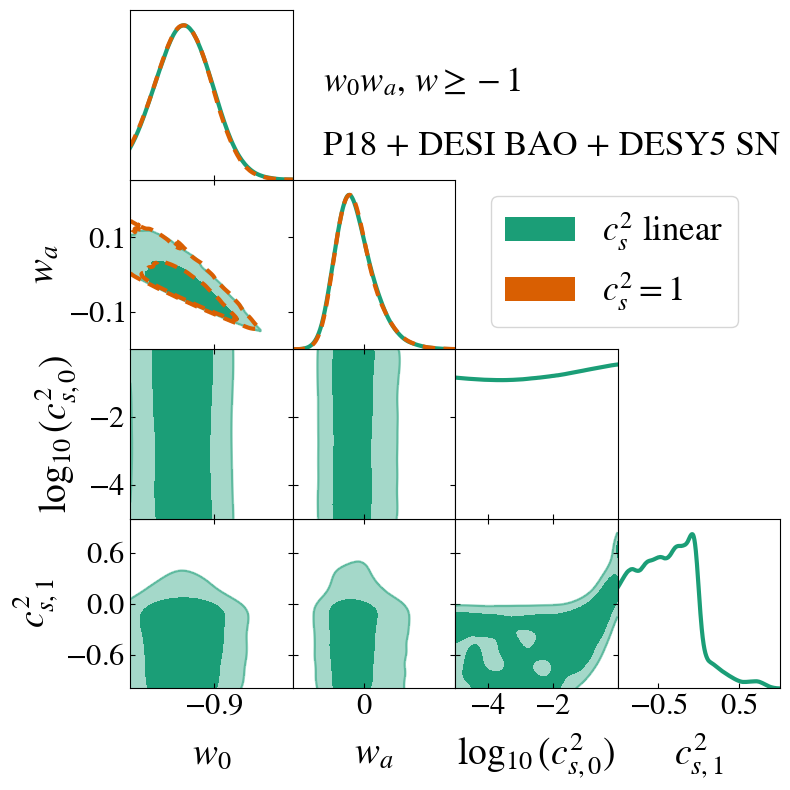

In [94]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
legend_labels = ["$c_s^2$ linear", "$c_s^2 = 1$"]
legend_handles = [
    mpl.patches.Patch(facecolor=utils.colors[0], label=legend_labels[0]),
    mpl.patches.Patch(facecolor=utils.colors[1], label=legend_labels[1]),
]
p.triangle_plot(
    [chains_by_index[3], chains_by_index[5]],
    ["w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.88, r"$w_0w_a$, $w \geq -1$", fontsize=25)
p.fig.text(0.41, 0.8, r"P18 + DESI BAO + DESY5 SN", fontsize=25)
p.export("plots/triangle_w0waq_ds1.pdf")

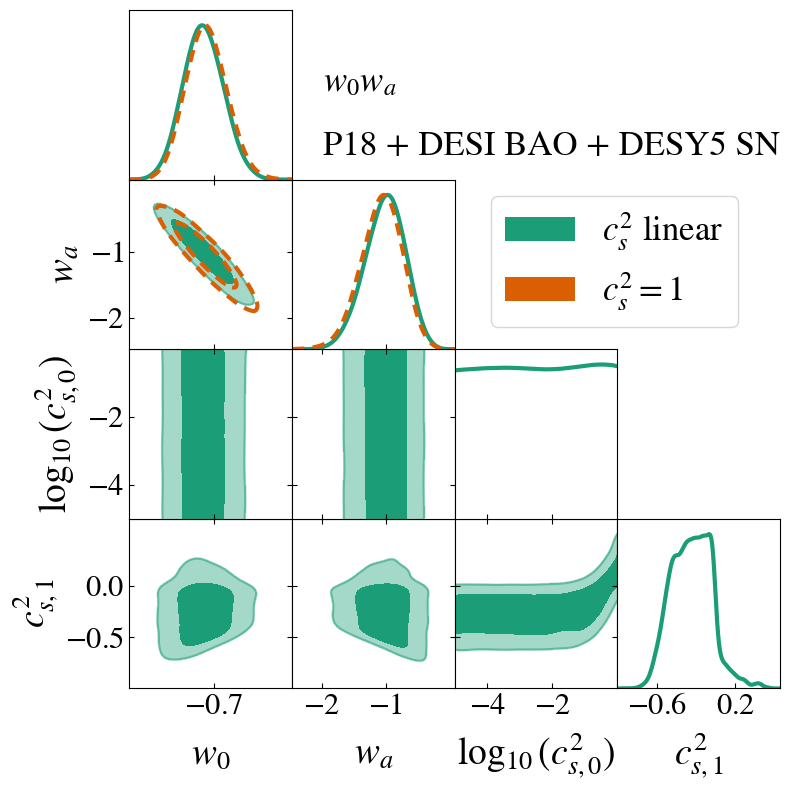

In [95]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains_by_index[4], chains_by_index[6]],
    ["w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.88, r"$w_0w_a$", fontsize=25)
p.fig.text(0.41, 0.8, r"P18 + DESI BAO + DESY5 SN", fontsize=25)
p.export("plots/triangle_w0wa_ds1.pdf")

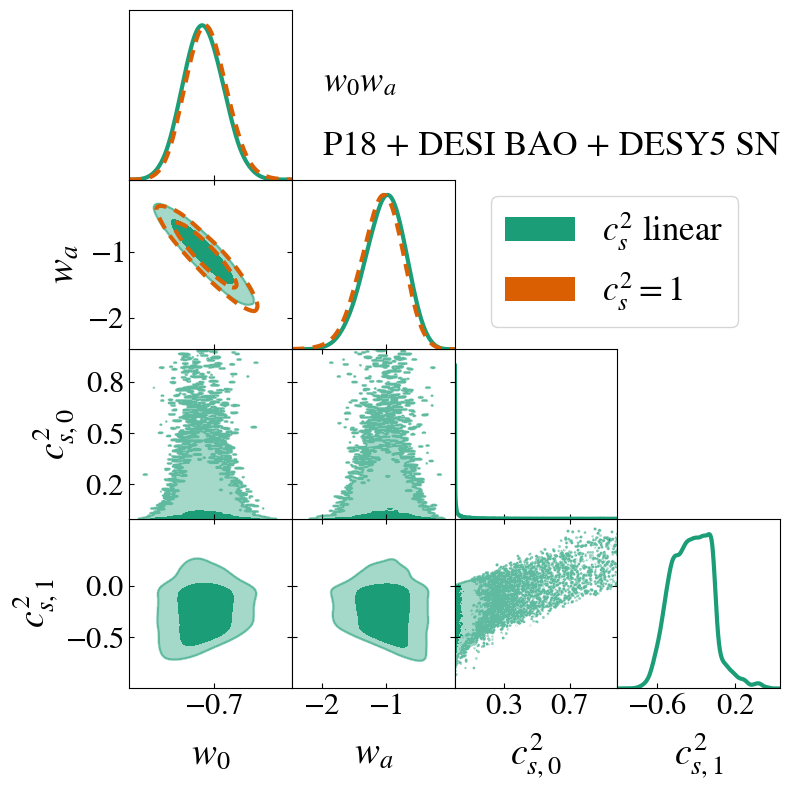

In [96]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains_by_index[4], chains_by_index[6]],
    ["w0", "wa", "cs2_0", "cs2_1"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.88, r"$w_0w_a$", fontsize=25)
p.fig.text(0.41, 0.8, r"P18 + DESI BAO + DESY5 SN", fontsize=25)
p.export("plots/triangle_w0wa_ds1_cs2_0.pdf")

In [ ]:
# Limits
for limit in [1, 2]:
    print("w0waq:", chains_by_index[3].getInlineLatex("cs2_1", limit=limit))
    print("w0wa:",  chains_by_index[4].getInlineLatex("cs2_1", limit=limit))

w0waq: c_{s,1}^2 = -0.40^{+0.38}_{-0.43}
w0wa: c_{s,1}^2 = -0.24^{+0.22}_{-0.19}
w0waq: c_{s,1}^2 < 0.176
w0wa: c_{s,1}^2 = -0.24^{+0.37}_{-0.41}


## Trying to reconstruct $c_s^2$

In [78]:
chain = chains_by_index[4]
params = ["log10_cs2_0", "cs2_1", "w0", "wa"]
stats = {}
cstats = chain.getMargeStats()
for param in params:
    s = cstats.parWithName(param)
    mean = s.mean
    sigma = (s.limits[0].upper - s.limits[0].lower)/2
    stats[param] = {"mean": mean, "sigma": sigma}
redshifts = np.linspace(0, 10, 200)
a = 1/(1 + redshifts)
mean_cs2 = 10**stats["log10_cs2_0"]["mean"] + stats["cs2_1"]["mean"]*(stats["w0"]["mean"] + stats["wa"]["mean"]*(1-a))
sigma_cs2 = 10**stats["log10_cs2_0"]["mean"]*np.log(10)*stats["log10_cs2_0"]["sigma"] + stats["cs2_1"]["sigma"]*(stats["w0"]["mean"] + stats["wa"]["mean"]*(1-a)) + stats["cs2_1"]["mean"]*stats["w0"]["sigma"] + stats["cs2_1"]["mean"]*stats["wa"]["mean"]*(1-a)

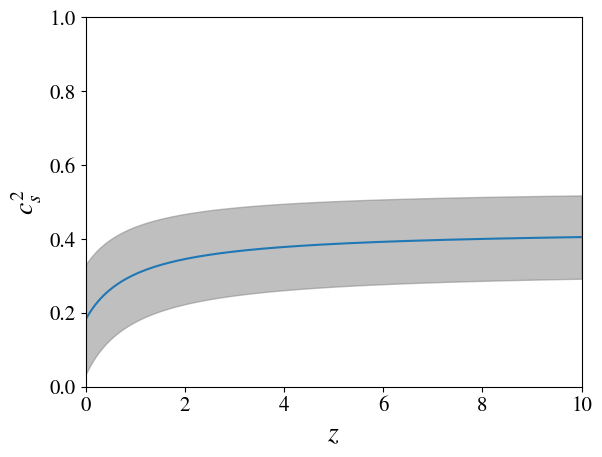

In [92]:
plt.plot(redshifts, mean_cs2)
plt.fill_between(redshifts, mean_cs2 - sigma_cs2, mean_cs2 + sigma_cs2, color="gray", alpha=0.5)
plt.xlim([0, redshifts[-1]])
plt.ylim([0, 1])
plt.xlabel("$z$", fontsize=20)
plt.ylabel("$c_s^2$", fontsize=20)
plt.tick_params(labelsize=15)
plt.savefig("plots/cs2_reconstruction.pdf")

## Triangle plots for DS2, comparing $c_s^2 = 1$ versus $c_s^2$ linear

<>:17: SyntaxWarning: invalid escape sequence '\g'
<>:17: SyntaxWarning: invalid escape sequence '\g'
/tmp/ipykernel_20278/2830372780.py:17: SyntaxWarning: invalid escape sequence '\g'
  p.fig.text(0.41, 0.95, "$w_0w_a$, $w \geq -1$", fontsize=25)


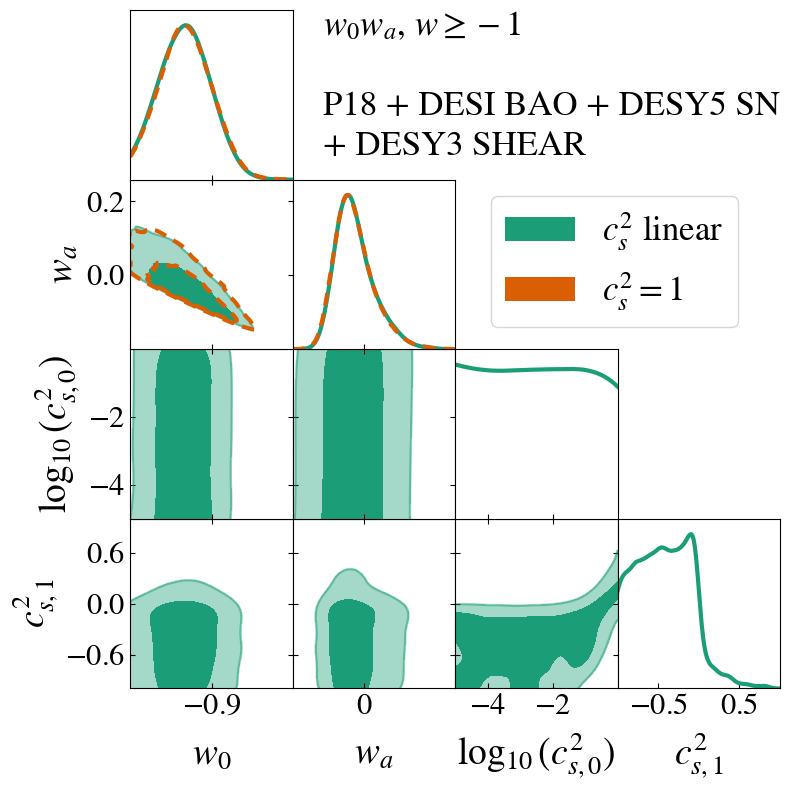

In [97]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains_by_index[7], chains_by_index[9]],
    ["w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.95, "$w_0w_a$, $w \geq -1$", fontsize=25)
p.fig.text(0.41, 0.85, "P18 + DESI BAO + DESY5 SN", fontsize=25)
p.fig.text(0.41, 0.8,  "+ DESY3 SHEAR", fontsize=25)
p.export("plots/triangle_w0waq_ds2.pdf")

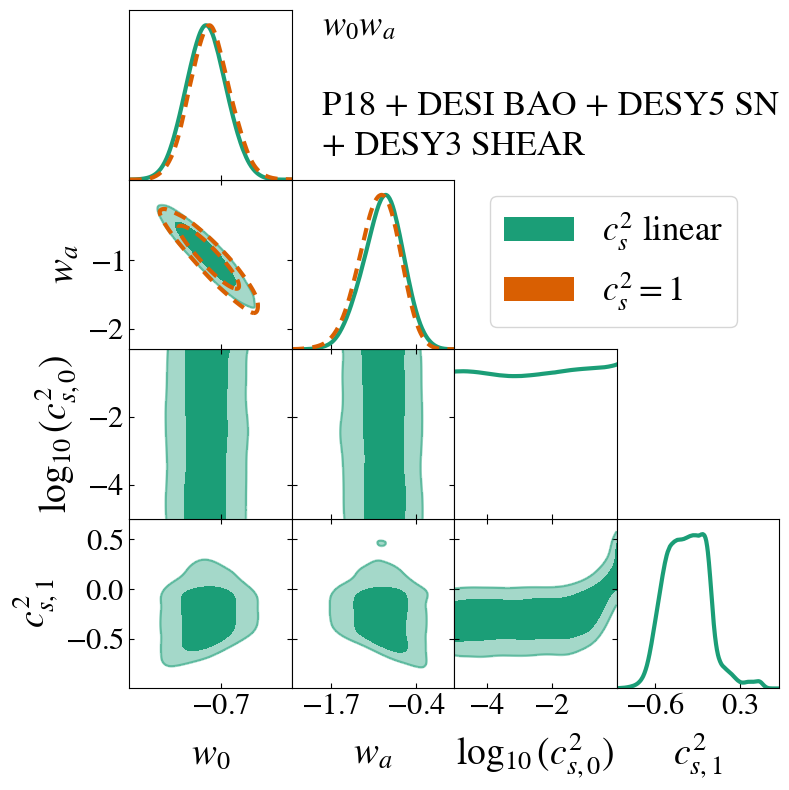

In [98]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains_by_index[8], chains_by_index[10]],
    ["w0", "wa", "log10_cs2_0", "cs2_1"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.95, "$w_0w_a$", fontsize=25)
p.fig.text(0.41, 0.85, "P18 + DESI BAO + DESY5 SN", fontsize=25)
p.fig.text(0.41, 0.8,  "+ DESY3 SHEAR", fontsize=25)
p.export("plots/triangle_w0wa_ds2.pdf")

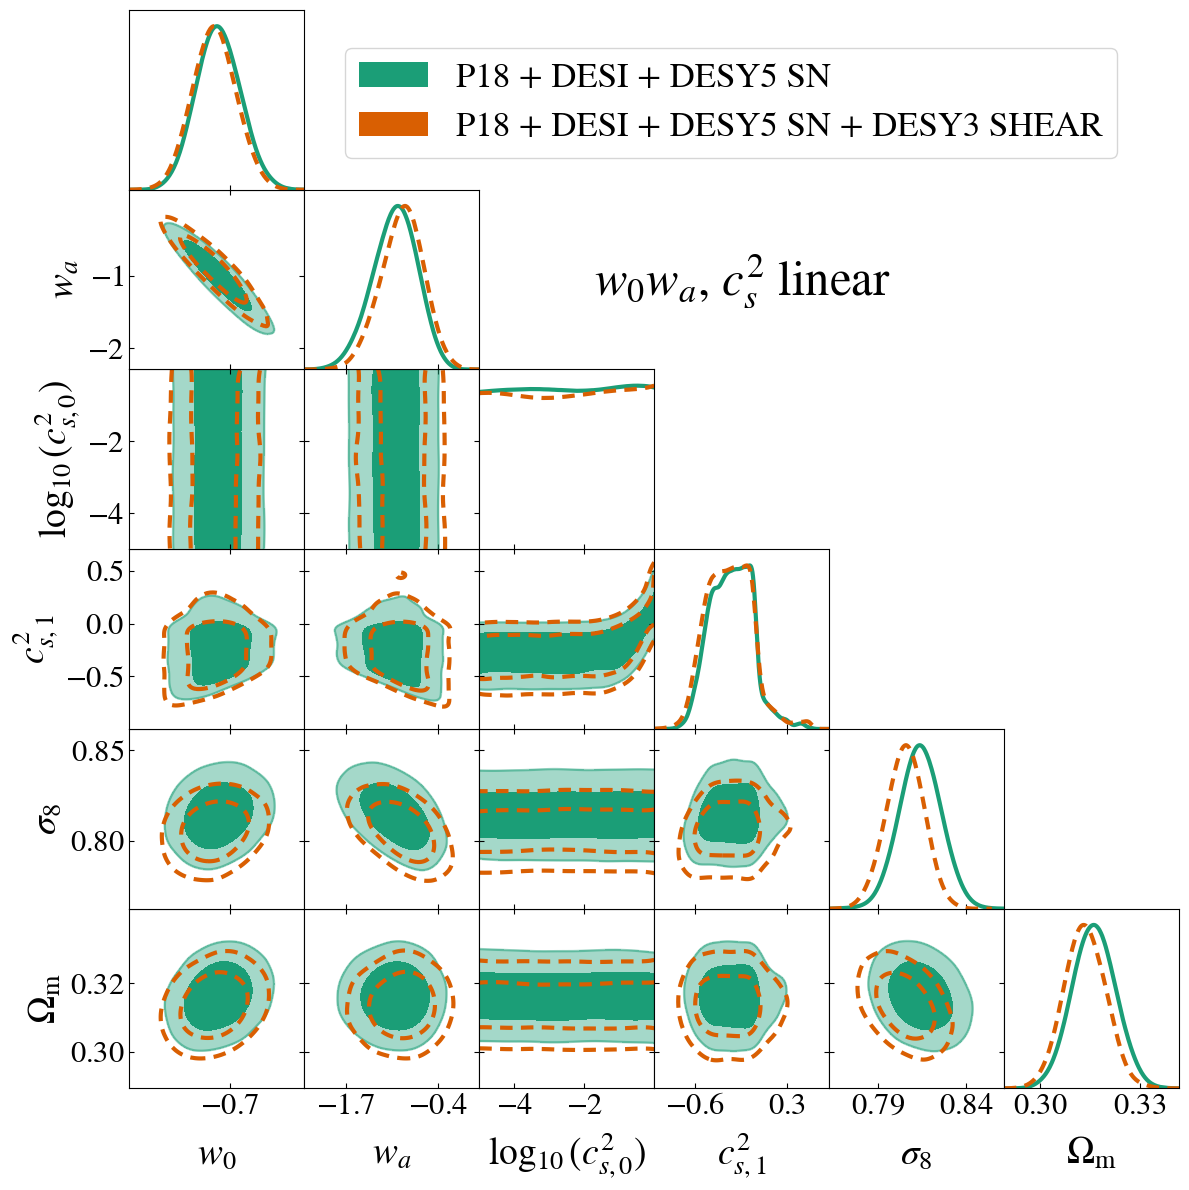

In [100]:
# Comparing DS1 and DS2
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
legend_labels = ["P18 + DESI + DESY5 SN", "P18 + DESI + DESY5 SN + DESY3 SHEAR"]
legend_handles = [
    mpl.patches.Patch(facecolor=utils.colors[0], label=legend_labels[0]),
    mpl.patches.Patch(facecolor=utils.colors[1], label=legend_labels[1]),
]
p.triangle_plot(
    [chains_by_index[4], chains_by_index[8]],
    ["w0", "wa", "log10_cs2_0", "cs2_1", "sigma8", "omegam"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.97))
p.fig.text(0.5, 0.75, "$w_0w_a$, $c_s^2$ linear", fontsize=35)
p.export("plots/triangle_w0wa_ds1_vs_ds2.pdf")

## Binned $c_s^2$

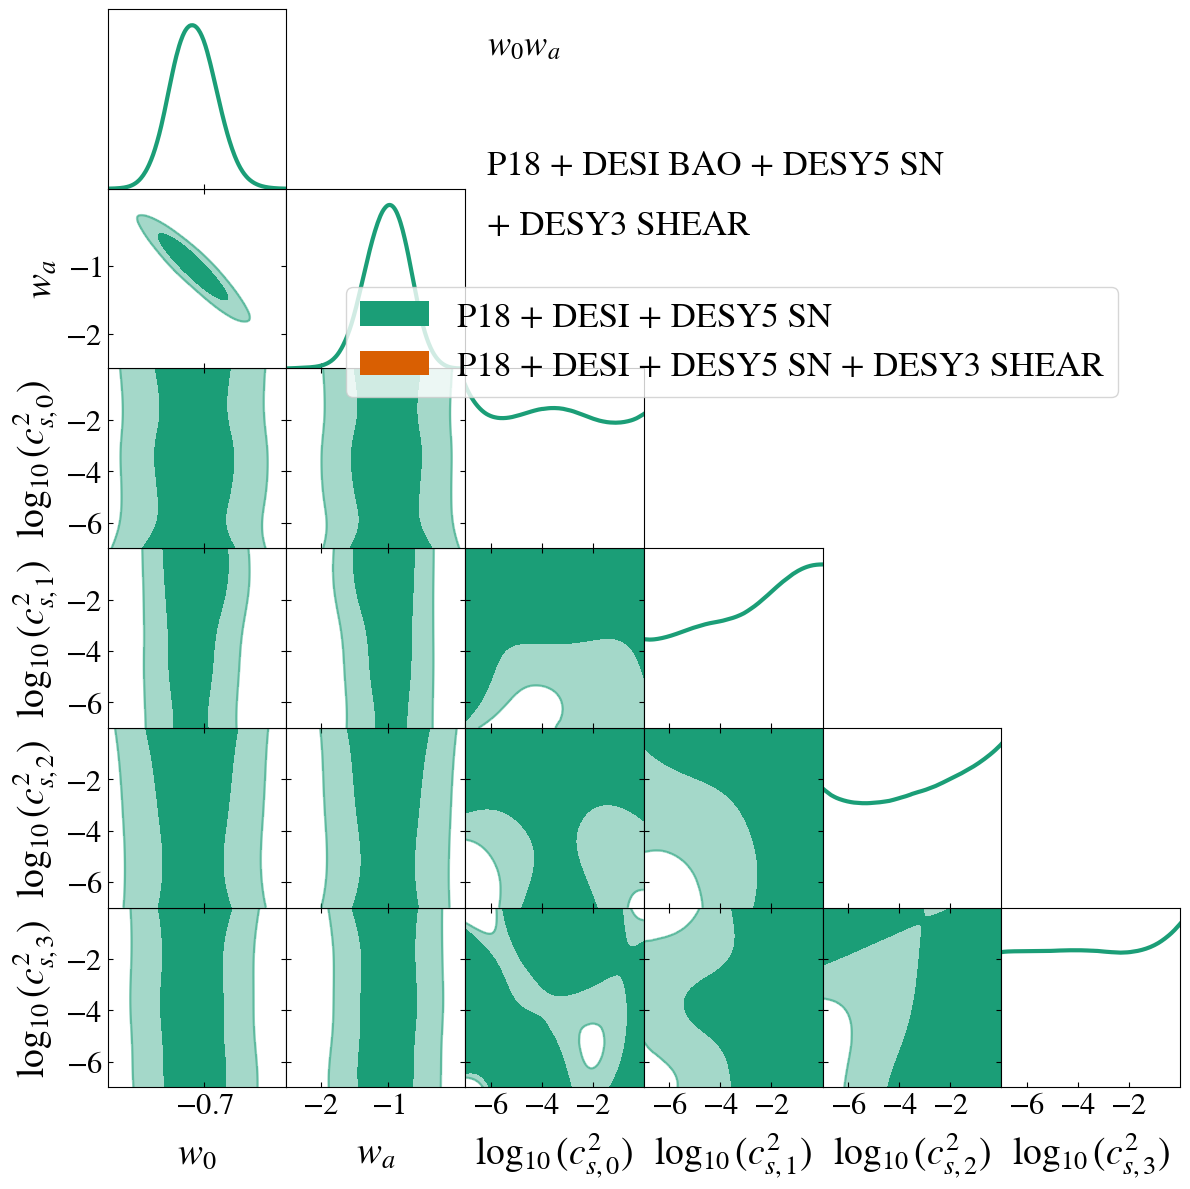

In [101]:
reload(utils)
p = getdist.plots.get_subplot_plotter()
p.settings.axes_fontsize=25
p.settings.axes_labelsize=30
p.settings.legend_fontsize=30
p.triangle_plot(
    [chains_by_index[12]],
    ["w0", "wa", "log10_cs2_0", "log10_cs2_1", "log10_cs2_2", "log10_cs2_3"],
    filled=[True, False],
    contour_colors=utils.colors,
    contour_ls=["-", "--"],
    contour_lws=3,
    legend_labels=[],
    legend_loc="right"
)
p.fig.legend(handles=legend_handles, fontsize=25, bbox_to_anchor=(0.95,0.77))
p.fig.text(0.41, 0.95, "$w_0w_a$", fontsize=25)
p.fig.text(0.41, 0.85, "P18 + DESI BAO + DESY5 SN", fontsize=25)
p.fig.text(0.41, 0.8,  "+ DESY3 SHEAR", fontsize=25)
p.export("plots/triangle_w0wa_cs2r_ds2.pdf")